# Gradient Descent
Sử dụng để xác định cực trị (gần đúng) trong trường hợp tính toán trực tiếp bất khả thi. Ý tưởng: xuất phát từ 1 điểm, lặp đến khi nó tiến gần đến điểm cực trị
 

## Gradient Descent cho hàm 1 biến
Bài toán đặt ra: tìm cực tiểu địa phương ($ x^*$) của hàm f(x) tức là: $ f'(x^*) = 0 $
- Chọn $x_t$ là điểm bắt đầu. Sau mỗi lần lặp đưa $x_t$ lại gần $x^*$
- Vì $x*$ là điểm cực tiểu:
    + Nếu $x_t > x^* => f'(x_t) > 0 => $ cần lùi $x_t$ về phía bên trái (và ngược lại) ($x_t$ nằm trong lân cận của $x^*$)  
    $$x_{t+1} = x_t + \Delta$$
    + Nhận thấy $\Delta$ trái dấu với $f'(x_t)$ và $x_t$ càng xa $x^*$ thì $f'(x_t)$ càng lớn  
    $$=> \Delta = -\eta f'(x_t)$$
    $$=> x_{t+1} = x_t -\eta f'(x_t)$$  
    $\eta$ được gọi là tốc độ học


## Hàm nhiều biến
$f(\theta)$ với $\theta$ là một vector.
Áp dụng tương tự như hàm 1 biến
$\theta_{t+1} = \theta_t - \eta * f'(\theta_t)$

### Ví dụ
Xét hàm mất mát của bài toán quy hoạch tuyến tính
 $$ \mathcal{L}(\textbf{w}) = \frac{1}{2\mathbf{N}} \mathbf{\|y - Xw\|_2^2} $$
 Chú ý: Mẫu số của hàm mất mát trong bài toán quy hoạch tuyến tính không có N. Nhằm tránh đạo hàm có giá trị là 1 số lớn, ảnh hưởng đến sự tính toán của máy tính
 $=>$ Đạo hàm của hàm mất mát là:
 $$ \mathcal{L} '(\textbf{w} )= \frac{1}{N} \mathbf{X^T(Xw-y)}$$

## Stochastic Gradient Descent
- Vấn đề của Gradient Descent thông thường là việc tính toán gradient cho tất cả điểm dữ liệu trong 1 lần rồi mới cập nhật $\theta$, điều này trở nên cồng kềnh và kém hiêu quả khi dữ liệu lớn hoặc các bài toán online learning
- SGD tính toán gradient cho 1 điểm dữ liệu $\mathbf{x}_i$ rồi cập nhật $\theta$
- Sau mỗi lần duyệt qua tất cả các điểm dữ liệu là 1 epoch
- Sau 1 epoch, cần shuffle thứ tự các điểm dữ liệu để đảm bảo tính ngẫu nhiên và hiệu suất của thuật toán
- Việc cập nhật lặp qua từng điểm dữ liệu có thể gây tốn thời gian hơn cho 1 epoch, tuy nhiên SGD cần ít epoch hơn để hội tụ

## Ví dụ
Sử dụng hàm loss của linear regression bên trên

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
X = np.random.rand(1000, 1)
y = 4 + 3 * X + 0.3 * np.random.rand(1000, 1)

# Thêm hàng toàn phần tử 1 vào X
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)


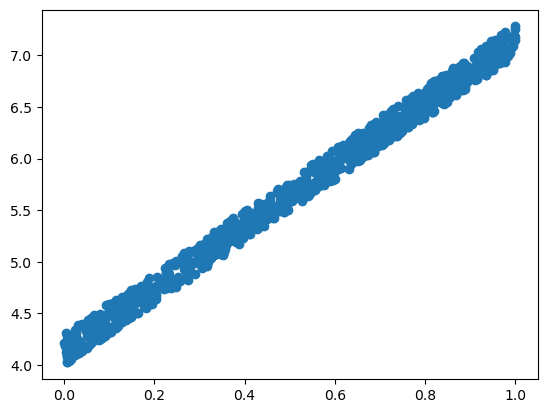

In [12]:
plt.scatter(X, y)

In [17]:
def loss(X, y, w):
    N = X.shape[0]
    return .5/N * np.linalg.norm(y - X.dot(w))

def grad(X, y, w):
    N = X.shape[0]
    return 1/N * X.T.dot(X.dot(w) - y)

Sử dụng batch gradient decsent

In [18]:
def BGD(X, y, w_init, num_epochs, lr):
    w_gd = [w_init]
    for i in range(num_epochs):
        w_new = w_gd[-1] - lr * grad(X, y, w_gd[-1])
        if np.linalg.norm(grad(X, y, w_new)) / len(w_new) < 10 ** - 3:
            break
        w_gd.append(w_new)
    return (w_gd[-1],i)

In [25]:
w_init = np.array([[2], [1]])
(w1, it1) = BGD(Xbar,y, w_init, num_epochs=10000, lr = 0.01)
print('Solution found by GD: w = ', w1.T, ',\nafter %d iterations.' %(it1+1))

Solution found by GD: w =  [[4.15764017 2.97866063]] ,
after 4741 iterations.


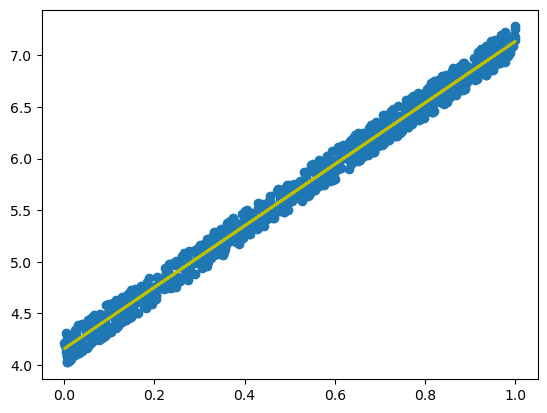

In [29]:
y_pred = Xbar.dot(w1)
plt.scatter(X, y)
plt.plot(X, y_pred,'y', linewidth=2)

In [34]:
def sgrad(xi, yi, w):
    a = np.dot(xi, w) - yi
    return (xi*a).reshape(2, 1)

In [44]:
def SGD(X, y, w_init, num_epochs, lr):
    w_gd = [w_init]
    w_last_check = w_init
    iter_check_w = 10
    count = 0
    for epoch in range(num_epochs):
        ids = np.random.permutation(X.shape[0])

        for idx in ids:
            w_new = w_gd[-1] - lr * sgrad(X[idx], y[idx], w_gd[-1])
            w_gd.append(w_new)

            if count % iter_check_w == 0:
                w_this_check = w_new

                if np.linalg.norm(w_this_check - w_last_check)/len(w_init) < 1e-7:
                    return (w_new, epoch)
                
                w_last_check = w_this_check
    
    return (w_gd[-1], epoch)




In [45]:
w_init = np.array([[2], [1]])
(w2, it2) = SGD(Xbar,y, w_init, num_epochs=10000, lr = 0.01)
print('Solution found by GD: w = ', w2.T, ',\nafter %d iterations.' %(it2+1))

Solution found by GD: w =  [[4.14624805 3.01196321]] ,
after 19 iterations.
